1.1 Collecting Trading Data

In [ ]:
#!pip install yfinance beautifulsoup4 requests

In [9]:
# import yfinance as yf
# import pandas as pd
# import datetime

# def fetch_stock_data(ticker):
#     stock = yf.Ticker(ticker)
#     info = stock.info
#     listing_date = info.get('ipoStartDate', '1900-01-01')  # Default to a very old date if IPO date is not available
#     listing_date = datetime.datetime.strptime(listing_date, '%Y-%m-%d').date()
#     end_date = datetime.date.today()
#     data = yf.download(ticker, start=listing_date, end=end_date)
#     return data

# def save_data_to_csv(ticker, data):
#     file_name = f"{ticker}_historical_data.csv"
#     data.to_csv(file_name)
#     print(f"Data for {ticker} saved to {file_name}")

# def load_data_from_csv(ticker):
#     file_name = f"{ticker}_historical_data.csv"
#     try:
#         data = pd.read_csv(file_name, index_col=0, parse_dates=[0])
#         print(f"Data for {ticker} loaded from {file_name}")
#         return data
#     except FileNotFoundError:
#         print(f"No existing data for {ticker}. Fetching new data.")
#         return None

# # Get user input
# ticker = input("Enter the stock ticker symbol (e.g., 'RELIANCE.NS'): ")
# data = load_data_from_csv(ticker)

# if data is None:
#     data = fetch_stock_data(ticker)
#     save_data_to_csv(ticker, data)


KeyboardInterrupt: Interrupted by user

1.2 Collecting Web Data via Scrapping

In [ ]:
# !pip install beautifulsoup4 requests

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# # Define the URL of the financial news website
# url = 'https://example-financial-news.com'  # Replace with actual URL

# # Function to scrape news headlines
# def scrape_news(url):
#     response = requests.get(url)
#     soup = BeautifulSoup(response.text, 'html.parser')
#     headlines = [item.get_text() for item in soup.find_all('h2')]  # Adjust selector based on the website's structure
#     return headlines

# # Scrape headlines
# headlines = scrape_news(url)
# print("Latest Headlines:")
# for headline in headlines:
#     print(headline)

Enter the stock ticker symbol (e.g., 'RELIANCE.NS'): colpal.ns
Total number of anomalies detected: 56


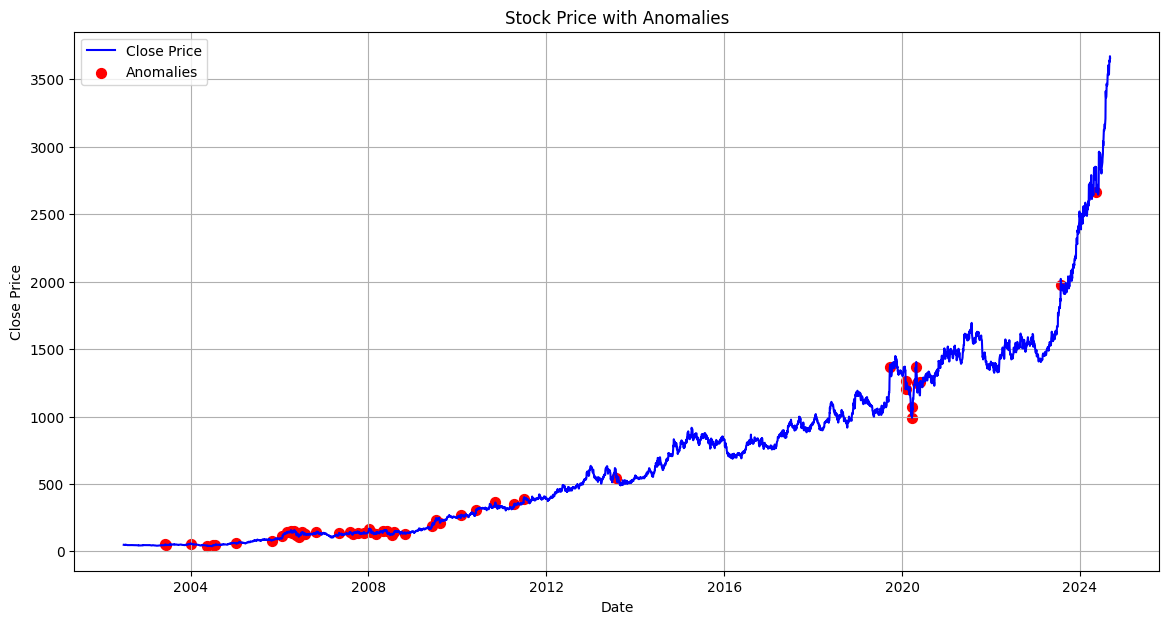

In [21]:
# Install required packages
!pip install yfinance matplotlib scikit-learn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

def normalize_ticker(ticker):
    """Normalize the ticker input to uppercase and remove whitespace."""
    return ticker.strip().upper()

def validate_ticker(ticker):
    """Validate the ticker input format (alphanumeric or containing periods)."""
    return ticker.isalnum() or '.' in ticker

def fetch_stock_data(ticker):
    """Fetch historical data for a given ticker from Yahoo Finance."""
    stock = yf.Ticker(ticker)
    data = stock.history(period="max")  # Fetch data from the earliest available date to today
    return data

def detect_anomalies(data):
    """Detect anomalies in the stock data using Isolation Forest."""
    # Use the adjusted close prices to detect anomalies
    df = data[['Close']].copy()
    df['Returns'] = df['Close'].pct_change()  # Calculate daily returns

    # Handle missing values by dropping them
    df.dropna(inplace=True)

    # Train the Isolation Forest model
    model = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination levelnn
    df['Anomaly'] = model.fit_predict(df[['Returns']])

    # Filter out the anomaly points
    anomalies = df[df['Anomaly'] == -1]
    return anomalies

def plot_with_anomalies(data, anomalies):
    """Plot the stock data with anomalies marked in red."""
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')

    # Mark anomalies with red dots
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies', s=50)

    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Price with Anomalies')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    """Main workflow to handle user input, fetch data, detect anomalies, and plot."""
    ticker = input("Enter the stock ticker symbol (e.g., 'RELIANCE.NS'): ")
    ticker = normalize_ticker(ticker)

    if not validate_ticker(ticker):
        print("Invalid ticker symbol. Please enter a valid ticker.")
        return

    try:
        # Fetch data and detect anomalies
        data = fetch_stock_data(ticker)
        anomalies = detect_anomalies(data)

        # Calculate the number of anomalies detected
        total_anomalies = len(anomalies)
        print(f"Total number of anomalies detected: {total_anomalies}")

        # Plot the data with anomalies
        plot_with_anomalies(data, anomalies)

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()
